In [3]:
import pandas as pd

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!pip install torchaudio

     |████████████████████████████████| 3.2MB 2.8MB/s 


In [6]:
import matplotlib.pyplot as plt
import sys
import torch
import torchaudio

sys.path.insert(0, "/content/drive/My Drive/ASR")
from utils.torchaudio_methods import draw_waveform, draw_spectrogram
from utils.audio_stats import get_audio_stats, get_audio_meta
from utils.text_stats import *

In [7]:
data = pd.read_csv('/content/drive/My Drive/ASR/numbers/train.csv')
data['filename'] = data['path'].apply(lambda x: x.split('/')[1])
data.head()

,path,gender,number,filename
0,train/e332b996d3.wav,female,157105,e332b996d3.wav
1,train/e25afda49a.wav,female,374554,e25afda49a.wav
2,train/364f147340.wav,male,688694,364f147340.wav
3,train/5e0954b206.wav,female,265381,5e0954b206.wav
4,train/7130a67690.wav,male,955415,7130a67690.wav


In [8]:
train_stats = pd.read_csv('/content/drive/My Drive/ASR/train_audio_stats.csv')
train_stats.head()

,filename,channels,frames,sample_rate_hz,size_bytes,duration_s,bitrate
0,c9f135a051.wav,1,62074,24000,124192,2.586417,16
1,ba12ffc49a.wav,1,70800,24000,141644,2.950000,16
2,163b0615c2.wav,1,70955,24000,141954,2.956458,16
3,e501388a6c.wav,1,72367,24000,144778,3.015292,16
4,813db80f67.wav,1,74902,24000,149848,3.120917,16


In [9]:
train = train_stats.join(data.set_index('filename'), on='filename', how='inner')
train.head()

,filename,channels,frames,sample_rate_hz,size_bytes,duration_s,bitrate,path,gender,number
0,c9f135a051.wav,1,62074,24000,124192,2.586417,16,train/c9f135a051.wav,female,82401
1,ba12ffc49a.wav,1,70800,24000,141644,2.950000,16,train/ba12ffc49a.wav,male,225937
2,163b0615c2.wav,1,70955,24000,141954,2.956458,16,train/163b0615c2.wav,female,69836
3,e501388a6c.wav,1,72367,24000,144778,3.015292,16,train/e501388a6c.wav,female,901876
4,813db80f67.wav,1,74902,24000,149848,3.120917,16,train/813db80f67.wav,female,246851


In [10]:
train.shape

(9000, 10)

In [11]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=7)

train['fold'] = None

i = 1
for train_index, test_index in kf.split(train, train['number']):
  train.at[test_index, 'fold'] = i
  i += 1

In [12]:
train.head()

,filename,channels,frames,sample_rate_hz,size_bytes,duration_s,bitrate,path,gender,number,fold
0,c9f135a051.wav,1,62074,24000,124192,2.586417,16,train/c9f135a051.wav,female,82401,2
1,ba12ffc49a.wav,1,70800,24000,141644,2.950000,16,train/ba12ffc49a.wav,male,225937,5
2,163b0615c2.wav,1,70955,24000,141954,2.956458,16,train/163b0615c2.wav,female,69836,3
3,e501388a6c.wav,1,72367,24000,144778,3.015292,16,train/e501388a6c.wav,female,901876,4
4,813db80f67.wav,1,74902,24000,149848,3.120917,16,train/813db80f67.wav,female,246851,2


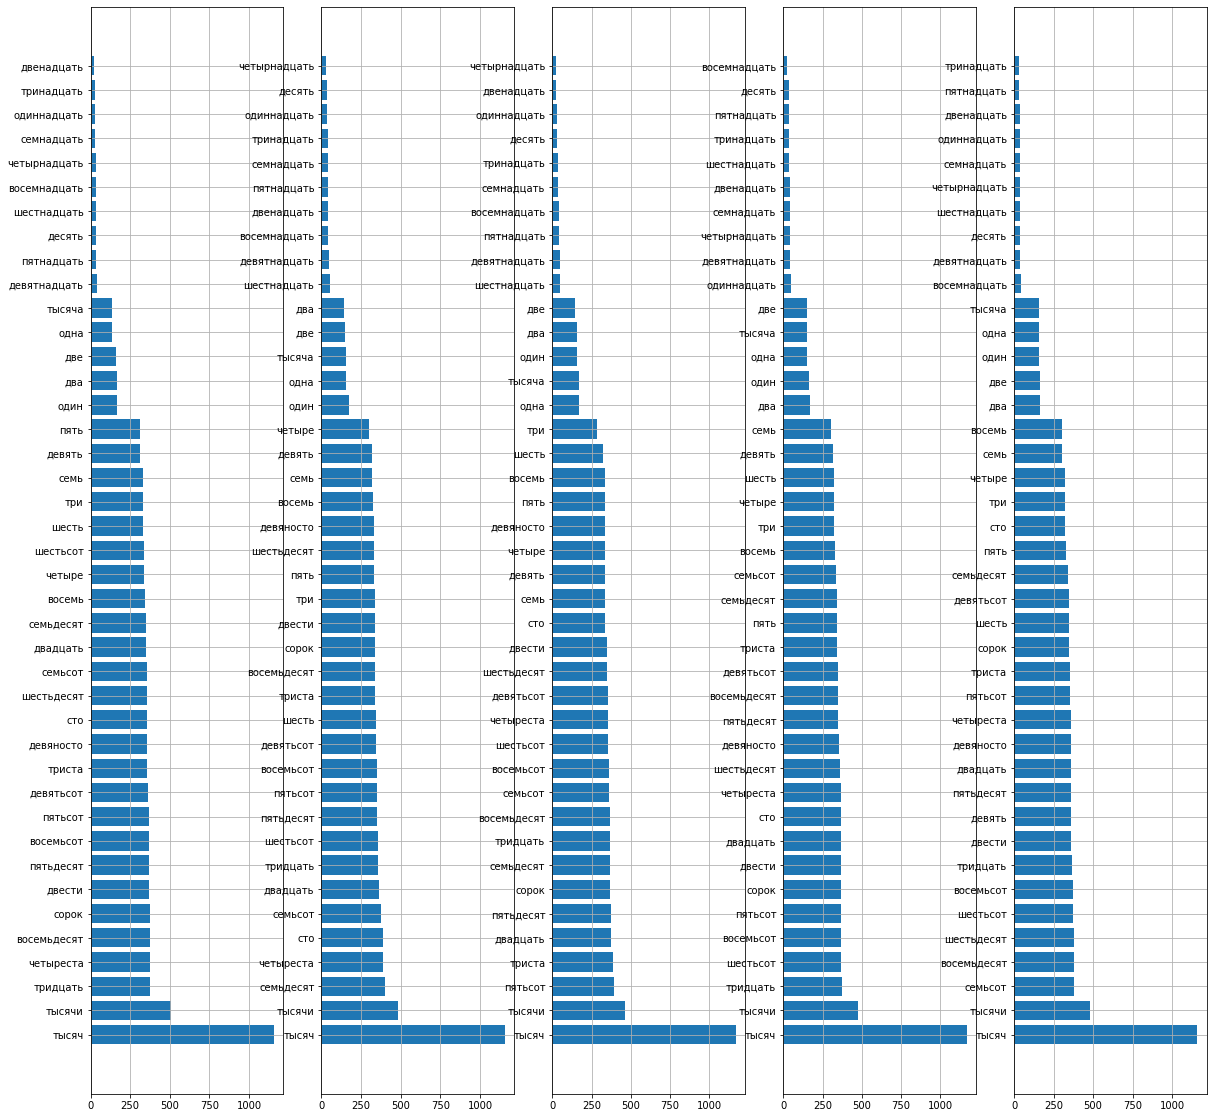

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

In [40]:
fig, ax = plt.subplots(1, 5,figsize=(20,20))
for i in range(5):
  counter = get_word_counter(train.loc[train['fold'] == i + 1]['number'])
  most_common = counter.most_common(41)
  fig = plt.figure(figsize=(20,5))
  ax[i].barh([x[0] for x in most_common], [x[1] for x in most_common])
  ax[i].grid()

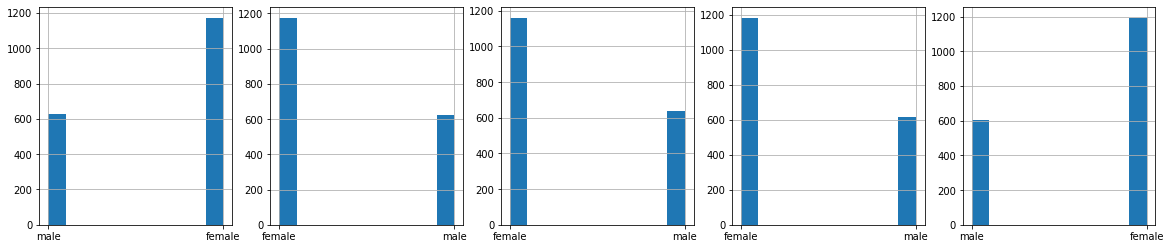

In [39]:
fig, ax = plt.subplots(1, 5,figsize=(20,4))
for i in range(5):
  ax[i].hist(train.loc[train['fold'] == i + 1]['gender'])
  ax[i].grid()

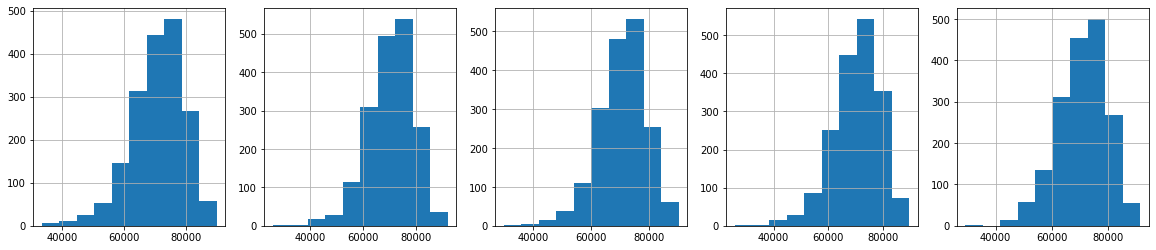

In [41]:
fig, ax = plt.subplots(1, 5,figsize=(20,4))
for i in range(5):
  ax[i].hist(train.loc[train['fold'] == i + 1]['frames'])
  ax[i].grid()

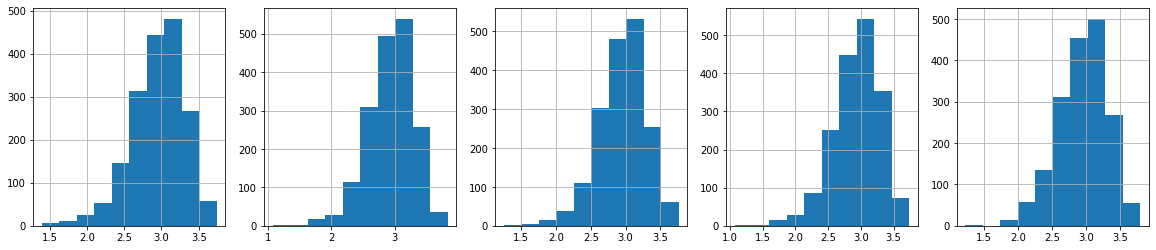

In [42]:
fig, ax = plt.subplots(1, 5,figsize=(20,4))
for i in range(5):
  ax[i].hist(train.loc[train['fold'] == i + 1]['duration_s'])
  ax[i].grid()

In [16]:
train.to_csv('/content/drive/My Drive/ASR/cross_val_train.csv', index=False)